# Hola Roberto! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>r</b> <a class="tocSkip"></a>



    
Saludos!    

</div>

<div class="alert alert-block alert-info">
<b>Muchas gracias por el feedback, reenvio con la correccion.</b> <a class="tocSkip"></a>
</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v</b> <a class="tocSkip"></a>

Bien hecho Roberto, has completado correctamente todo lo necesario del notebook. No tengo comentarios de corrección adicionales, está aprobado.

Saludos!

</div>

---

# A/B Test Analysis & Hypotheses

## Descripción del proyecto

Contexto
Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.



In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from datetime import timedelta
sns.set_style('whitegrid')
np.random.seed(42)

In [402]:
# Cargar los datos
hypotheses_df = pd.read_csv("/datasets/hypotheses_us.csv", sep=";")
orders_df = pd.read_csv("/datasets/orders_us.csv")
visits_df = pd.read_csv("/datasets/visits_us.csv")

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto. Bien hecho al importar la data usando el parámetro `sep=;"` para que la lectura de los datos se pueda realizar correctamente.
    
Si la data se hubiese leido sin ese parámetro, todas las columnas quedarían en una sola. En este caso, para esta data, la única columna hubiese sido `'Hypothesis;Reach;Impact;Confidence;Effort'`. Si el dataframe ya estuviese así importado, se puede corregir haciendo 
    
    `df = df['Hypothesis;Reach;Impact;Confidence;Effort'].str.split(';', expand=True)`

</div>

In [403]:
# Verificar las primeras filas de cada DataFrame
print("Hypotheses DataFrame:")
hypotheses_df.head()

Hypotheses DataFrame:


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [404]:
hypotheses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [405]:
print("\nVisits DataFrame:")
visits_df.head()


Visits DataFrame:


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [406]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [407]:
print("Duplicados en visits:", visits_df.duplicated().sum())

Duplicados en visits: 0


In [408]:
# Convertir la columna 'date' a formato datetime
visits_df['date'] = pd.to_datetime(visits_df['date'])

# Verificar el cambio
print(visits_df.info())
visits_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [409]:
print("\nOrders DataFrame:")
orders_df.head()


Orders DataFrame:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [410]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [411]:
# Convertir la columna 'date' a formato datetime
orders_df['date'] = pd.to_datetime(orders_df['date'])

# Verificar el cambio
print(orders_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
None


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien con la revisión inicial de la data.

</div>

### Parte 1. Priorizar hipótesis 

In [412]:
hypotheses_df.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [413]:
# Cálculo de ICE y RICE
hypotheses_df['ICE'] = (hypotheses_df['Impact'] * hypotheses_df['Confidence']) / hypotheses_df['Effort']

hypotheses_df['RICE'] = (
    hypotheses_df['Reach'] * hypotheses_df['Impact'] * hypotheses_df['Confidence']
) / hypotheses_df['Effort']

In [414]:
hypotheses_df.head()

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


Ordenarlas en orden descendente de prioridad.

In [415]:
# orden descendente de prioridad.
ice_rank = hypotheses_df.sort_values(by='ICE', ascending=False)
rice_rank = hypotheses_df.sort_values(by='RICE', ascending=False)

display(ice_rank[['Hypothesis', 'ICE']].reset_index(drop=True))
display(rice_rank[['Hypothesis', 'RICE']].reset_index(drop=True))

,Hypothesis,ICE
0,Launch a promotion that gives users discounts ...,16.200000
1,Add two new channels for attracting traffic. T...,13.333333
2,Add a subscription form to all the main pages....,11.200000
3,Show banners with current offers and sales on ...,8.000000
4,Add product recommendation blocks to the store...,7.000000
5,Launch your own delivery service. This will sh...,2.000000
6,Add a customer review page. This will increase...,1.333333
7,Change the category structure. This will incre...,1.125000
8,Change the background color on the main page. ...,1.000000


,Hypothesis,RICE
0,Add a subscription form to all the main pages....,112.0
1,Add product recommendation blocks to the store...,56.0
2,Add two new channels for attracting traffic. T...,40.0
3,Show banners with current offers and sales on ...,40.0
4,Launch a promotion that gives users discounts ...,16.2
5,Change the category structure. This will incre...,9.0
6,Launch your own delivery service. This will sh...,4.0
7,Add a customer review page. This will increase...,4.0
8,Change the background color on the main page. ...,3.0


In [416]:

# Calcular puntajes
hypotheses_df['ICE Score'] = (hypotheses_df['Impact'] * hypotheses_df['Confidence']) / hypotheses_df['Effort']
hypotheses_df['RICE Score'] = (hypotheses_df['Reach'] * hypotheses_df['Impact'] * hypotheses_df['Confidence']) / hypotheses_df['Effort']

# Ordenar hipótesis según ambos métodos
ice_order = hypotheses_df.sort_values(by='ICE Score', ascending=False)[['Hypothesis', 'ICE Score']]
rice_order = hypotheses_df.sort_values(by='RICE Score', ascending=False)[['Hypothesis', 'RICE Score']]

# Fusionar los resultados en una sola tabla
comparison_df = ice_order.merge(rice_order, on='Hypothesis', how='inner')

# Mostrar la comparación
comparison_df.head()

,Hypothesis,ICE Score,RICE Score
0,Launch a promotion that gives users discounts ...,16.200000,16.2
1,Add two new channels for attracting traffic. T...,13.333333,40.0
2,Add a subscription form to all the main pages....,11.200000,112.0
3,Show banners with current offers and sales on ...,8.000000,40.0
4,Add product recommendation blocks to the store...,7.000000,56.0


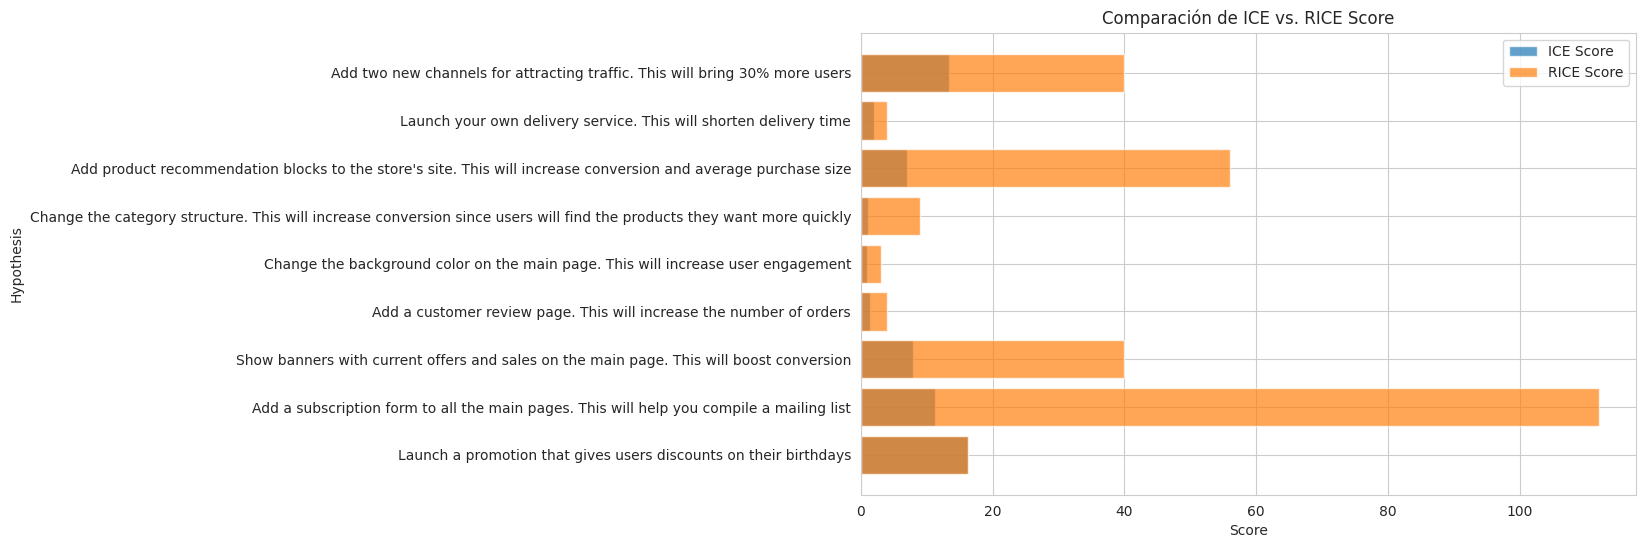

In [417]:
# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(hypotheses_df['Hypothesis'], hypotheses_df['ICE Score'], label='ICE Score', alpha=0.7)
plt.barh(hypotheses_df['Hypothesis'], hypotheses_df['RICE Score'], label='RICE Score', alpha=0.7)

# Configuración del gráfico
plt.xlabel('Score')
plt.ylabel('Hypothesis')
plt.title('Comparación de ICE vs. RICE Score')
plt.legend()
plt.gca().invert_yaxis()  # Invertir el eje Y para que la mejor hipótesis esté arriba
plt.show()

Explicación del gráfico
Se mostrarán las hipótesis en el eje Y, ordenadas por RICE Score.

ICE Score y RICE Score estarán representados como barras de diferentes colores.

Se podrá observar cómo algunas hipótesis ganan prioridad en RICE debido al Reach, mientras que otras pueden perder relevancia.

podemos identificar cómo el factor Reach influye en RICE. Las hipótesis con alto alcance tienden a subir posiciones en RICE, mientras que ICE favorece ideas con combinación de alto impact y confianza frente a menor esfuerzo.
Vemos que la fuerza esye en Rice Score 


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho con el cálculo de ambas métricas y su comparación con el gráfico

</div>

### Parte 2. Análisis del test A/B
2.1 Realizaste una prueba A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visits_us.csv.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Antes de continuar con los análisis, revisa si existen usuarios duplicados entre grupos, es decir, que estén en ambos grupos. Si existen, muestra cuántos son y luego remuevelos, ya que es importante que no se repitan para realizar el test A/B de forma adecuada.
</div>

<div class="alert alert-block alert-info">
<b>Aqui se eliminaron los usuarios presentes en ambos grupos(Duplicados).</b> <a class="tocSkip"></a>
</div>

In [418]:
# Ver usuarios duplicados entre grupos A y B
duplicated_users = orders_df.groupby('visitorId')['group'].nunique()
duplicated_users = duplicated_users[duplicated_users > 1]  # Filtrar usuarios que aparecen en más de un grupo

print(f"Usuarios duplicados entre grupos: {duplicated_users.shape[0]}")

Usuarios duplicados entre grupos: 58


In [419]:
grupo_usuario = orders_df.groupby('visitorId')['group'].nunique().reset_index()

duplicados = grupo_usuario[grupo_usuario['group'] > 1]['visitorId']
orders_df = orders_df[~orders_df['visitorId'].isin(duplicados)]

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho, correcto!

</div>

In [420]:
orders_per_user = orders_df.groupby('visitorId').agg({'transactionId':'nunique'}).reset_index()
orders_per_user.rename(columns={'transactionId':'orders'}, inplace=True)


In [421]:
# Extraer usuarios con pedidos anómalos
q99_orders = np.percentile(orders_per_user['orders'], 99)
q99_rev = np.percentile(orders_df['revenue'], 99)
orders_threshold = q99_orders
revenue_threshold = q99_rev

In [422]:
abnormal_users = orders_per_user[orders_per_user['orders'] > orders_threshold]['visitorId']
filtered_orders = orders_df[~orders_df['visitorId'].isin(abnormal_users) & (orders_df['revenue'] <= revenue_threshold)]

In [423]:
filtered_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [424]:
# Ver usuarios duplicados entre grupos A y B
duplicated_users = orders_df.groupby('visitorId')['group'].nunique()
duplicated_users = duplicated_users[duplicated_users > 1]  # Filtrar usuarios que aparecen en más de un grupo

print(f"Usuarios duplicados entre grupos: {duplicated_users.shape[0]}")

Usuarios duplicados entre grupos: 0


In [425]:
orders_df.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [426]:
# Ingreso acumulado
cumulative_revenue = (
    orders_df.groupby(['group', 'date'])['revenue']
    .sum()
    .groupby(level=0)
    .cumsum()
    .reset_index()
)
cumulative_revenue.head()

,group,date,revenue
0,A,2019-08-01,2266.6
1,A,2019-08-02,3734.9
2,A,2019-08-03,5550.1
3,A,2019-08-04,6225.6
4,A,2019-08-05,7623.6


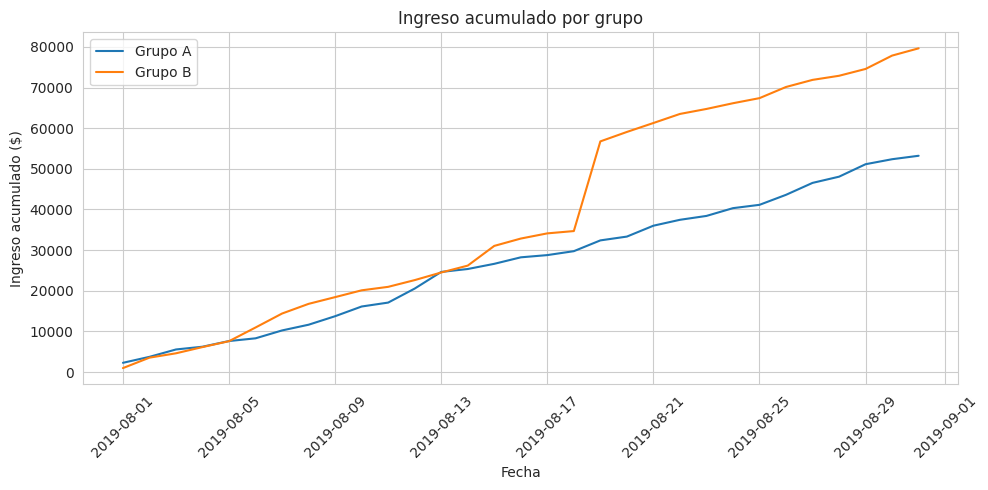

In [427]:
plt.figure(figsize=(10,5))
for grp in ['A', 'B']:
    grp_data = cumulative_revenue[cumulative_revenue['group']==grp]
    plt.plot(grp_data['date'], grp_data['revenue'], label=f'Grupo {grp}')
plt.title('Ingreso acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, es un día el que diferencia B del grupo A, pasado ese día, la curva sigue siendo paralela. 

</div>

Podemos ver el crecimiento mayor en el grupo B.

Diferencias en el crecimiento: Si un grupo muestra un ingreso acumulado significativamente mayor, la variación aplicada en ese grupo podría haber tenido un impacto positivo.

Tendencias en el tiempo: Si los ingresos en ambos grupos son similares hasta cierto punto y luego divergen, podríamos analizar qué factores causaron el cambio.

Validación estadística: Para asegurarnos de que la diferencia es significativa, podemos realizar una prueba estadística como t-test o Mann-Whitney U.

2.2 Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

In [428]:
# ticket medio diario
daily = orders_df.groupby(['group', 'date'])['revenue'].mean()
daily.head()

group  date      
A      2019-08-01    98.547826
       2019-08-02    77.278947
       2019-08-03    75.633333
       2019-08-04    61.409091
       2019-08-05    63.545455
Name: revenue, dtype: float64

In [429]:
#media acumulada por grupo, sin duplicar el nivel 'group'
avg_order = (
    daily
      .groupby(level=0, group_keys=False)        # evita la 2ª capa 'group'
      .apply(lambda s: s.expanding().mean())     # media acumulada
      .reset_index(name='revenue')               # pasa índice a columnas
)

avg_order.head()

,group,date,revenue
0,A,2019-08-01,98.547826
1,A,2019-08-02,87.913387
2,A,2019-08-03,83.820036
3,A,2019-08-04,78.217299
4,A,2019-08-05,75.282930


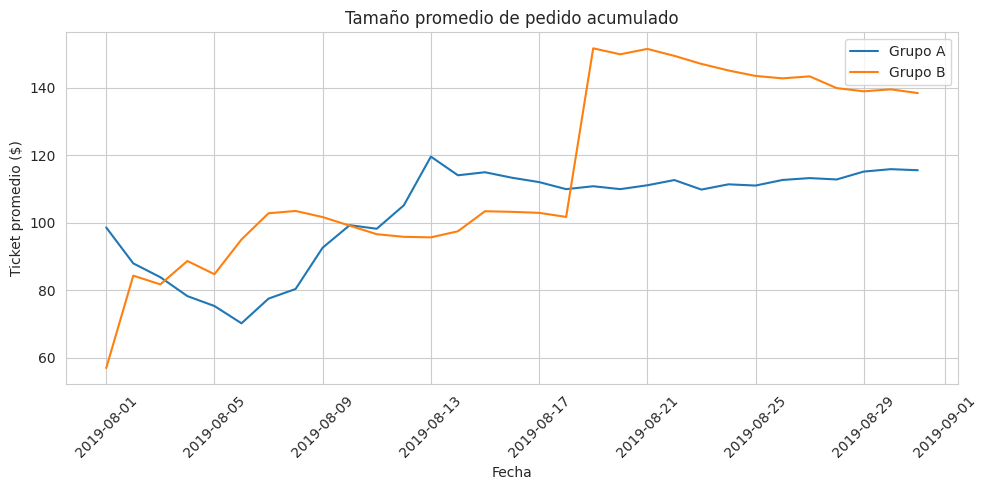

In [430]:
# gráfico
plt.figure(figsize=(10,5))
for g in ['A', 'B']:
    mask = avg_order['group'] == g
    plt.plot(avg_order.loc[mask, 'date'], avg_order.loc[mask, 'revenue'], label=f'Grupo {g}')
plt.title('Tamaño promedio de pedido acumulado')
plt.xlabel('Fecha'); plt.ylabel('Ticket promedio ($)')
plt.legend(); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, correcto. El mismo día que vimos en el otro gráfico, tuvo un promedio de pedidos muy grandes, por lo que se va confirmando nuestra sospecha. Luego de ese día, tiende a bajar, puesto que ya no hay pedidos tan grandes y debería volver a un nivel similar al anterior.

</div>

Se sigue viendo mas fuerte el grupo B por su mayur ingreso en los pedidos.

Diferencias entre grupos: Si un grupo muestra un tamaño de pedido promedio acumulado mayor, la variación aplicada podría haber incentivado compras de mayor valor.

Estabilidad o fluctuaciones: Si los datos muestran mucha variabilidad, podría indicar que factores externos están afectando los pedidos.

Impacto sostenido: Si la diferencia se mantiene a lo largo del tiempo, podríamos considerar la implementación de la variación de manera definitiva.

2.3 Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

In [431]:
merged_avg = (
    avg_order.pivot(index='date', columns='group', values='revenue')
    .reset_index()
)

merged_avg.head()

group,date,A,B
0,2019-08-01,98.547826,56.894118
1,2019-08-02,87.913387,84.275320
2,2019-08-03,83.820036,81.697832
3,2019-08-04,78.217299,88.623374
4,2019-08-05,75.282930,84.701556


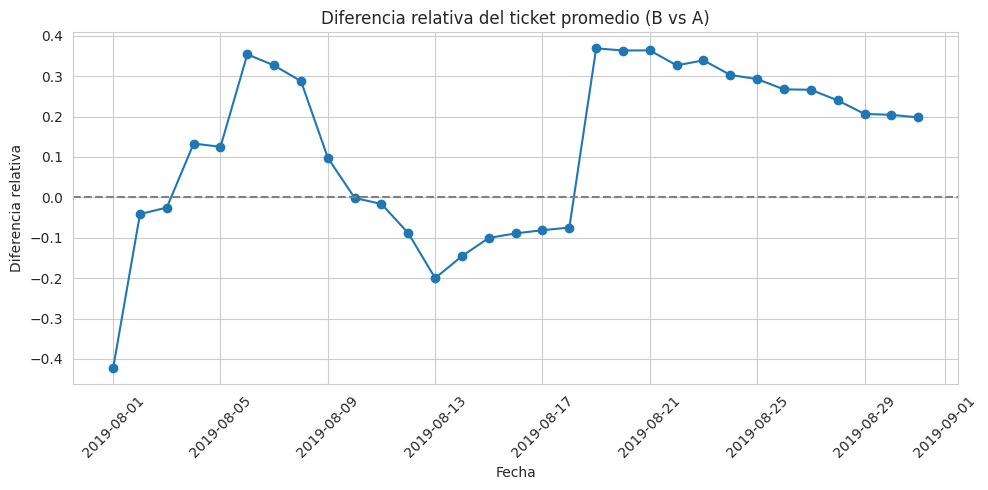

In [432]:
merged_avg['rel_diff'] = (merged_avg['B'] - merged_avg['A']) / merged_avg['A']

plt.figure(figsize=(10,5))
plt.plot(merged_avg['date'], merged_avg['rel_diff'], marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Diferencia relativa del ticket promedio (B vs A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Una diferencia estable y positiva indicaría que B tiene un ticket promedio mayor.

Diferencias entre grupos: Si un grupo muestra un tamaño de pedido promedio acumulado mayor, la variación aplicada podría haber incentivado compras de mayor valor.

Estabilidad o fluctuaciones: Si los datos muestran mucha variabilidad, podría indicar que factores externos están afectando los pedidos.

Impacto sostenido: Si la diferencia se mantiene a lo largo del tiempo, podríamos considerar la implementación de la variación de manera definitiva.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto el gráfico, nos muestra que después de la primera semana los tamaños se iban regularizando hasta el 18/08. En esa fecha, B aumenta, pero posterior a esa fecha, los tamaños de pedidos promedio acumulado tienden a igualarse.

</div>

2.4 Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

In [433]:
# Pedidos por día y grupo
orders_per_day = orders_df.groupby(['group', 'date']).agg({'transactionId':'nunique'}).reset_index()
orders_per_day.rename(columns={'transactionId':'orders'}, inplace=True)

orders_per_day.head()

,group,date,orders
0,A,2019-08-01,23
1,A,2019-08-02,19
2,A,2019-08-03,24
3,A,2019-08-04,11
4,A,2019-08-05,22


In [434]:
# Unimos con visits
daily = pd.merge(visits_df, orders_per_day, on=['group','date'], how='left').fillna(0)
daily['conversion'] = daily['orders'] / daily['visits']

daily.head()

,date,group,visits,orders,conversion
0,2019-08-01,A,719,23,0.031989
1,2019-08-02,A,619,19,0.030695
2,2019-08-03,A,507,24,0.047337
3,2019-08-04,A,717,11,0.015342
4,2019-08-05,A,756,22,0.029101


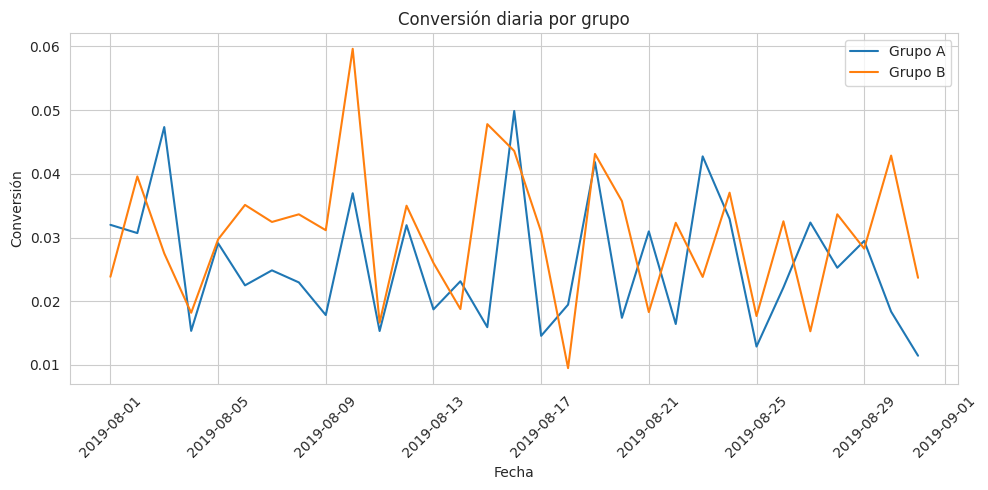

In [435]:
plt.figure(figsize=(10,5))
for grp in ['A','B']:
    grp_data = daily[daily['group']==grp]
    plt.plot(grp_data['date'], grp_data['conversion'], label=f'Grupo {grp}')
plt.title('Conversión diaria por grupo')
plt.xlabel('Fecha')
plt.ylabel('Conversión')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Si la tasa de conversión del grupo B es mayor que la del grupo A: La variación aplicada al grupo B podría haber incentivado más compras.

Si las tasas de conversión son similares: Es posible que la variación no haya tenido un impacto significativo en el comportamiento de los usuarios.

Si hay fluctuaciones en ciertos días: Factores externos como promociones, cambios en la demanda o eventos especiales podrían haber influido en las conversiones.

Si la tendencia del grupo B es negativa: Podría indicar que la variación aplicada tuvo un efecto adverso en la experiencia del usuario.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien! Las conversiones se ven similares para ambos grupos

</div>

2.5 Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

In [436]:
orders_per_user = orders_df.groupby('visitorId').agg({'transactionId':'nunique'}).reset_index()
orders_per_user.rename(columns={'transactionId':'orders'}, inplace=True)

orders_per_user.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


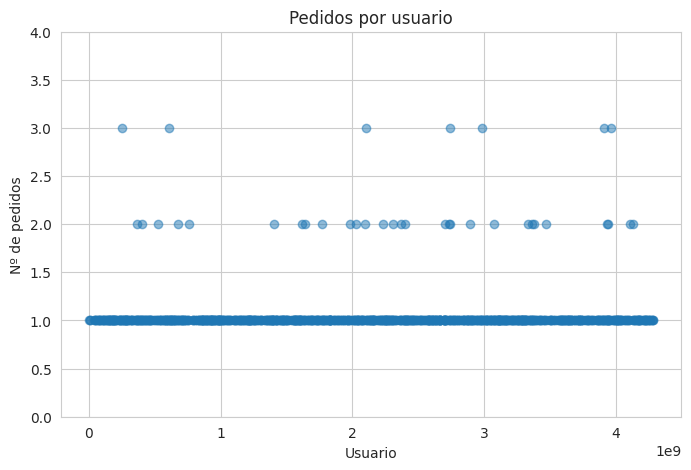

In [437]:
plt.figure(figsize=(8,5))
plt.scatter(orders_per_user['visitorId'], orders_per_user['orders'], alpha=0.5)
plt.title('Pedidos por usuario')
plt.xlabel('Usuario')
plt.ylabel('Nº de pedidos')
plt.ylim(0, orders_per_user['orders'].max()+1)
plt.show()

<div class="alert alert-block alert-danger">
<b></b> <a class="tocSkip"></a>

n</div>

<div class="alert alert-block alert-info">
<b>Correcto el grafico cambia al eliminar los duplicados.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien, corregido!

</div>

Distribución de compradores: Si hay pocos usuarios con muchas compras y muchos usuarios con pocas compras, el negocio puede depender de clientes recurrentes.

Clientes frecuentes vs. nuevos: Si la mayoría de los usuarios tienen solo un pedido, podríamos explorar estrategias para mejorar la retención de clientes.

Usuarios con compras extremas: Algunos clientes podrían realizar muchas compras en poco tiempo, lo que puede indicar compradores corporativos o una fuerte

In [438]:
q95_orders = np.percentile(orders_per_user['orders'], 95)
q99_orders = np.percentile(orders_per_user['orders'], 99)
print(f'Percentil 95: {q95_orders}, Percentil 99: {q99_orders}')

Percentil 95: 1.0, Percentil 99: 2.0


Generalmente consideramos valores por encima del percentil 99 como anomalías

2.6 Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía. 

In [439]:
# Contar pedidos por usuario
orders_per_user = orders_df.groupby('visitorId')['transactionId'].count().reset_index()
orders_per_user.rename(columns={'transactionId': 'order_count'}, inplace=True)

# Calcular percentiles 95 y 99
percentile_95 = np.percentile(orders_per_user['order_count'], 95)
percentile_99 = np.percentile(orders_per_user['order_count'], 99)

# Definir anomalías (usuarios con pedidos mayores al percentil 99)
anomalies = orders_per_user[orders_per_user['order_count'] > percentile_99]

# Mostrar los resultados
print(f"Percentil 95: {percentile_95}")
print(f"Percentil 99: {percentile_99}")
print(f"Usuarios considerados anomalías:\n{anomalies}")

Percentil 95: 1.0
Percentil 99: 2.0
Usuarios considerados anomalías:
      visitorId  order_count
55    249864742            3
138   611059232            3
478  2108163459            3
632  2742574263            3
687  2988190573            3
890  3908431265            3
908  3967698036            3


Valores por encima del percentil 99 pueden ser considerados casos atípicos, ya que representan usuarios que han realizado un número de pedidos extraordinariamente alto en comparación con el resto.

Valores entre el percentil 95 y 99 pueden indicar usuarios con un comportamiento de compra superior al promedio, pero aún dentro de un rango razonable.

Posibles explicaciones de anomalías: Pueden ser clientes mayoristas, compradores corporativos o errores en la captura de datos.

2.7 Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

In [440]:
conversions = daily.groupby('group').agg({'orders':'sum', 'visits':'sum'})
conversions

,orders,visits
group,,
A,468,18736
B,548,18916


In [441]:
success = conversions['orders']
success

group
A    468
B    548
Name: orders, dtype: int64

In [442]:
trials = conversions['visits']
trials

group
A    18736
B    18916
Name: visits, dtype: int64

In [443]:
stat, pval = proportions_ztest(success, trials)
print(f'Estadístico z: {stat:.4f}, p-valor: {pval:.4f}')

Estadístico z: -2.3899, p-valor: 0.0169


Un p-valor < 0.05 indica diferencia significativa en la conversión.

In [444]:
q95_rev = np.percentile(orders_df['revenue'], 95)
q99_rev = np.percentile(orders_df['revenue'], 99)
print(f'Percentil 95: {q95_rev:.2f}, Percentil 99: {q99_rev:.2f}')

Percentil 95: 414.27, Percentil 99: 830.30


Un p-valor < 0.05 indica diferencia significativa en la conversión.

In [445]:
# Umbrales
orders_threshold = q99_orders
revenue_threshold = q99_rev

print("1", orders_threshold)
print("2", revenue_threshold)

1 2.0
2 830.3


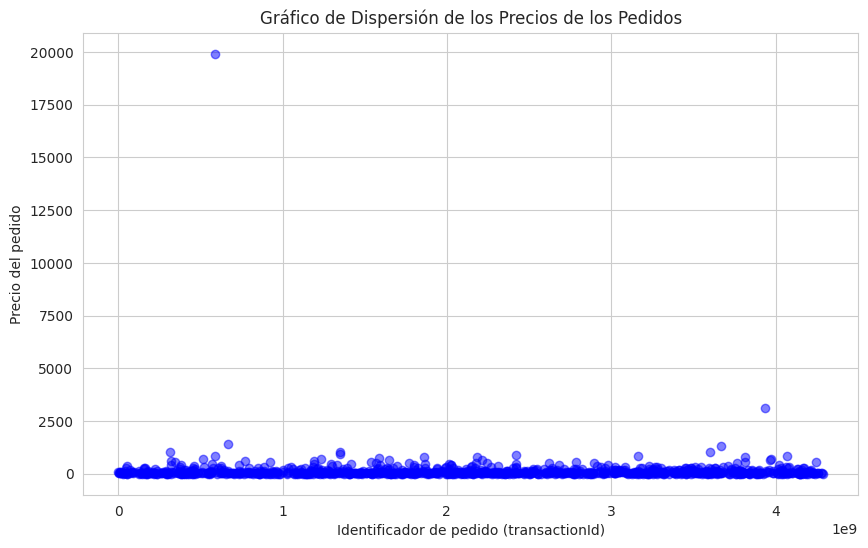

In [446]:
# Graficar dispersión de precios
plt.figure(figsize=(10, 6))
plt.scatter(orders_df['transactionId'], orders_df['revenue'], alpha=0.5, color='blue')

# Configuración del gráfico
plt.xlabel('Identificador de pedido (transactionId)')
plt.ylabel('Precio del pedido')
plt.title('Gráfico de Dispersión de los Precios de los Pedidos')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, efectivamente hay algunos precios de pedidos muy altos, especialmente uno, que afectan la data. Probablemente ese es el pedido que diferencia tanto el revenue acumulado de los grupos.

</div>

Distribución de precios: Si hay una concentración en ciertos rangos de precios, podríamos analizar qué productos o estrategias influyen en ello.

Anomalías: Si encontramos valores muy elevados o extremadamente bajos, podríamos verificar si son errores de captura o casos especiales.

Segmentación de clientes: Si se identifican distintos grupos de precios, podríamos inferir diferencias en el comportamiento de compra de los clientes.

2.8 Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [447]:
# Calcular percentiles 95 y 99
percentile_95 = np.percentile(orders_df['revenue'], 95)
percentile_99 = np.percentile(orders_df['revenue'], 99)

# Definir anomalías (pedidos con precio mayor al percentil 99)
anomalies = orders_df[orders_df['revenue'] > percentile_99]

# Mostrar resultados
print(f"Percentil 95: {percentile_95}")
print(f"Percentil 99: {percentile_99}")
print(f"Pedidos considerados anomalías:\n{anomalies}")

Percentil 95: 414.275
Percentil 99: 830.3
Pedidos considerados anomalías:
      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  19920.4     B
743      3603576309  4133034833 2019-08-09   1050.0     A
744      3668308183   888512513 2019-08-27   1335.6     B
940      2420050534  4003628586 2019-08-08    905.8     B
949      1347999392   887908475 2019-08-21    930.0     A
1099      316924019   148427295 2019-08-12   1015.9     A
1103     1348774318  1164614297 2019-08-12   1025.8     A
1136      666610489  1307669133 2019-08-13   1425.8     A
1196     3936777065  2108080724 2019-08-15   3120.1     B


Valores por encima del percentil 99 pueden ser considerados como casos atípicos, ya que representan precios de pedidos excepcionalmente altos comparados con el resto de los datos.

Valores entre el percentil 95 y 99 pueden indicar precios superiores al promedio pero aún dentro de un rango razonable.

Posibles explicaciones de anomalías: Podrían deberse a compras de gran volumen, productos exclusivos o errores en la captura de datos.

2.9 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [448]:
# Contar el número total de pedidos por grupo
orders_count = orders_df.groupby('group')['transactionId'].count()

# Contar el número total de visitas por grupo
visits_count = visits_df.groupby('group')['visits'].sum()

# Crear tabla de contingencia
conversion_table = pd.DataFrame({'orders': orders_count, 'visits': visits_count})
conversion_table['not_ordered'] = conversion_table['visits'] - conversion_table['orders']

# Aplicar prueba de chi-cuadrado
chi2_stat, p_value, _, _ = stats.chi2_contingency(conversion_table[['orders', 'not_ordered']])

# Mostrar resultados
print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Evaluar significancia
if p_value < 0.05:
    print("La diferencia en la conversión entre los grupos es estadísticamente significativa.")
else:
    print("No se encontró una diferencia estadísticamente significativa entre los grupos.")

Estadístico Chi-cuadrado: 5.5608
Valor p: 0.0184
La diferencia en la conversión entre los grupos es estadísticamente significativa.


Si el p-value es menor que 0.05, la diferencia de conversión es significativa y podemos inferir que el cambio aplicado al grupo B tuvo un efecto real en la tasa de conversión.

Si el p-value es mayor que 0.05, no hay evidencia suficiente para afirmar que la diferencia observada no es producto del azar.

Si el grupo B tiene una conversión superior y es significativa, podríamos considerar implementar la variación de manera definitiva.

Si los resultados no muestran diferencia significativa, podría ser necesario analizar otros factores como segmentación de usuarios o duración de la prueba.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho con este test de hipótesis. El test de chi-cuadrado es adecuado en este caso.

</div>

2.10 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [449]:
# Comparar la distribución de ingresos entre los grupos
group_A = orders_df[orders_df['group'] == 'A']['revenue']
group_B = orders_df[orders_df['group'] == 'B']['revenue']



# Aplicar prueba t de Student (si los datos siguen distribución normal)
t_stat, p_value_t = stats.ttest_ind(group_A, group_B)

# Aplicar prueba de Mann-Whitney U (si los datos no siguen distribución normal)
u_stat, p_value_u = stats.mannwhitneyu(group_A, group_B)

# Mostrar resultados
print(f"Prueba t de Student - Estadístico: {t_stat:.4f}, p-value: {p_value_t:.4f}")
print(f"Prueba Mann-Whitney U - Estadístico: {u_stat:.4f}, p-value: {p_value_u:.4f}")

# Evaluar significancia
if p_value_t < 0.05 or p_value_u < 0.05:
    print("La diferencia en el tamaño promedio de pedido entre los grupos es estadísticamente significativa.")
else:
    print("No se encontró una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.")

Prueba t de Student - Estadístico: -0.7757, p-value: 0.4381
Prueba Mann-Whitney U - Estadístico: 129041.5000, p-value: 0.8622
No se encontró una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.


Si la diferencia es significativa, el cambio aplicado al grupo B pudo haber influido en el tamaño promedio de los pedidos.

Si la diferencia no es significativa, podríamos considerar que la variación no tuvo un impacto real o que otros factores afectaron la conversión.

Si la distribución de ingresos muestra grandes diferencias, podríamos investigar si ciertos usuarios tienen compras fuera de lo común.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, para este caso se requiere un test como del de Mann-Whitney U.

</div>

In [450]:
filtered_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


2.11 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [451]:
# Contar el número total de pedidos por grupo
orders_count = filtered_orders.groupby('group')['transactionId'].count()

# Contar el número total de visitas por grupo
visits_count = visits_df.groupby('group')['visits'].sum()

# Crear tabla de contingencia
conversion_table = pd.DataFrame({'orders': orders_count, 'visits': visits_count})
conversion_table['not_ordered'] = conversion_table['visits'] - conversion_table['orders']

# Aplicar prueba de chi-cuadrado
chi2_stat, p_value, _, _ = stats.chi2_contingency(conversion_table[['orders', 'not_ordered']])

# Mostrar resultados
print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Evaluar significancia
if p_value < 0.05:
    print("La diferencia en la conversión entre los grupos es estadísticamente significativa.")
else:
    print("No se encontró una diferencia estadísticamente significativa entre los grupos.")

Estadístico Chi-cuadrado: 7.3990
Valor p: 0.0065
La diferencia en la conversión entre los grupos es estadísticamente significativa.


Si el p-value es menor que 0.05, la diferencia en conversión entre los grupos es significativa, lo que indica que la variación aplicada en el test A/B tuvo un impacto real en la tasa de conversión.

Si el p-value es mayor que 0.05, no hay evidencia estadística suficiente para afirmar que la variación tuvo un efecto significativo en la conversión.

Comparación con datos sin filtrar: Si los resultados cambian significativamente en comparación con los datos sin filtrar, podríamos analizar qué anomalías estaban afectando los resultados iniciales.

2.12 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [452]:

# Comparar la distribución de ingresos entre los grupos
group_A = filtered_orders[orders_df['group'] == 'A']['revenue']
group_B = filtered_orders[orders_df['group'] == 'B']['revenue']


# Aplicar prueba t de Student (si los datos siguen distribución normal)
t_stat, p_value_t = stats.ttest_ind(group_A, group_B)

# Aplicar prueba de Mann-Whitney U (si los datos no siguen distribución normal)
u_stat, p_value_u = stats.mannwhitneyu(group_A, group_B)

# Mostrar resultados
print(f"Prueba t de Student - Estadístico: {t_stat:.4f}, p-value: {p_value_t:.4f}")
print(f"Prueba Mann-Whitney U - Estadístico: {u_stat:.4f}, p-value: {p_value_u:.4f}")

# Evaluar significancia
if p_value_t < 0.05 or p_value_u < 0.05:
    print("La diferencia en el tamaño promedio de pedido entre los grupos es estadísticamente significativa.")
else:
    print("No se encontró una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.")

Prueba t de Student - Estadístico: 0.3823, p-value: 0.7023
Prueba Mann-Whitney U - Estadístico: 121514.0000, p-value: 0.8220
No se encontró una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.


/tmp/ipykernel_33/3538114560.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group_A = filtered_orders[orders_df['group'] == 'A']['revenue']
/tmp/ipykernel_33/3538114560.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group_B = filtered_orders[orders_df['group'] == 'B']['revenue']


Si la diferencia es significativa, el cambio aplicado al grupo B pudo haber influido en el tamaño promedio de los pedidos.

Si la diferencia no es significativa, podríamos considerar que la variación no tuvo un impacto real o que otros factores afectaron la conversión.

Si la distribución de ingresos muestra grandes diferencias, podríamos investigar si ciertos usuarios tienen compras fuera de lo común.

2.13 Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, muy bien los tests!

</div>

### Decisión basada en los resultados:
1.Parar la prueba y considerar a un grupo como líder → Si el grupo B tuvo mejor conversión y un mayor tamaño promedio de pedido con significancia estadística, podríamos implementar los cambios en toda la tienda online.
2.Parar la prueba y concluir que no hay diferencia → Si los resultados no muestran diferencias claras entre los grupos, podríamos concluir que la variación probada no tuvo un impacto significativo.
3.Continuar la prueba → Si los resultados aún no son concluyentes y la prueba no ha alcanzado el tamaño de muestra adecuado, podríamos extender la duración para obtener datos más sólidos. 

Si ambos indicadores muestran una mejora significativa (p < 0.05) para el grupo B, se podría considerar a B como ganador y detener la prueba. Si no hay diferencia significativa o los resultados son contradictorios, recomendamos continuar o parar concluyendo que no hay diferencias.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho con estas conclusiones. Podrías mejorarlas incluyendo algunos valores de las métricas más importantes, así las afirmaciones realizadas estarían mejor apoyadas en hechos.
    
</div>